<a href="https://colab.research.google.com/github/Mercymerine/Machine_learning2/blob/main/Brain_tumors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors
 86% 13.0M/15.1M [00:01<00:00, 15.8MB/s]
100% 15.1M/15.1M [00:01<00:00, 10.1MB/s]


In [ ]:
#Unzipping the dataset
!unzip -q brain-mri-images-for-brain-tumor-detection.zip

replace brain_tumor_dataset/no/1 no.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Lists image files: It uses os.listdir() to grab the filenames of the first 5 images in the specified folder (image_folder).

Opens each image: It opens each image file using PIL (Python Imaging Library), which allows you to load and work with images in Python.

Displays each image: It then uses matplotlib, a popular plotting library, to display the images one by one in a popup window or inline (if you are using a Jupyter Notebook).

In [ ]:
#Viewing the sample images unzipped
import os
os.listdir('brain_tumor_dataset')

['yes', 'no']

In [ ]:
#Viewing each image in each dataset
os.listdir('brain_tumor_dataset/no')

['no 96.jpg',
 'no 100.jpg',
 'no 4.jpg',
 'no 923.jpg',
 '43 no.jpg',
 'No17.jpg',
 'N5.jpg',
 '20 no.jpg',
 '8 no.jpg',
 'N20.JPG',
 'no 89.jpg',
 '29 no.jpg',
 'No18.jpg',
 '32 no.jpg',
 '23 no.jpg',
 '36 no.jpg',
 'No12.jpg',
 '22 no.jpg',
 'no 1.jpg',
 '38 no.jpg',
 'no 95.jpg',
 '26 no.jpg',
 '19 no.jpg',
 '7 no.jpg',
 'No15.jpg',
 'no 3.jpg',
 '48 no.jpeg',
 '28 no.jpg',
 '10 no.jpg',
 'No21.jpg',
 'no 7.jpeg',
 '49 no.jpg',
 '13 no.jpg',
 'no 2.jpg',
 '5 no.jpg',
 'N15.jpg',
 '18 no.jpg',
 '21 no.jpg',
 '46 no.jpg',
 'no 8.jpg',
 'no 98.jpg',
 '2 no.jpeg',
 'no 6.jpg',
 '24 no.jpg',
 '50 no.jpg',
 'no 9.png',
 '35 no.jpg',
 '41 no.jpg',
 'No22.jpg',
 'No11.jpg',
 '39 no.jpg',
 '11 no.jpg',
 '12 no.jpg',
 'no 91.jpeg',
 '40 no.jpg',
 '1 no.jpeg',
 'N2.JPG',
 'No19.jpg',
 '17 no.jpg',
 '37 no.jpg',
 'N6.jpg',
 'No13.jpg',
 'no 97.jpg',
 'N1.JPG',
 'No16.jpg',
 '14 no.jpg',
 '27 no.jpg',
 'no 5.jpeg',
 'N3.jpg',
 '25 no.jpg',
 'no 92.jpg',
 'no 10.jpg',
 'N16.jpg',
 'N26.JPG',
 '3

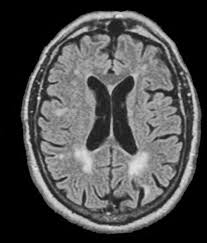

In [ ]:
#Viewing each image sample actual picture
from PIL import Image
Image.open('brain_tumor_dataset/no/22 no.jpg')

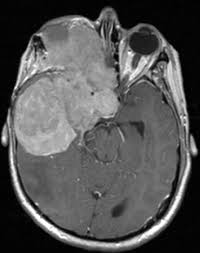

In [ ]:
import os
os.listdir('brain_tumor_dataset/yes')

from PIL import Image
Image.open('/content/brain_tumor_dataset/yes/Y106.jpg')

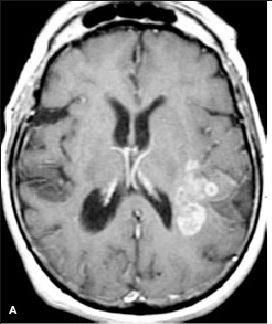

In [ ]:
from PIL import Image
Image.open('/content/brain_tumor_dataset/yes/Y111.JPG')

## **Load the data with ImageDataGenerator**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module keras.src.legacy.preprocessing.image:

class ImageDataGenerator(builtins.object)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, interpolation_order=1, dtype=None)
 |  
 |  DEPRECATED.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_

In [ ]:
#Rescaling the data and applying augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                rotation_range = 40,
                                width_shift_range =0.2,
                                height_shift_range =0.2,
                                shear_range = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip =True,
                                validation_split = 0.2)

In [ ]:
#Loading the training data
train_data = train_datagen.flow_from_directory('/content/brain_tumor_dataset',
                                               target_size = (256, 256),
                                               batch_size = 32,
                                               class_mode = 'categorical',
                                               subset = 'training')

Found 203 images belonging to 2 classes.


In [ ]:
#Loading the validation data
validation_data = train_datagen.flow_from_directory('/content/brain_tumor_dataset',
                                                    target_size = (256, 256),
                                                    batch_size =32,
                                                    class_mode = 'categorical',
                                                    subset = 'validation')

Found 50 images belonging to 2 classes.


## **BUILD THE CNN MODEL**

In [ ]:
from tensorflow.keras import layers, models

#Initalize the CNN model
model = models.Sequential()

#Add convolutionn and pooling layers
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

#Flatten the data for fully connected layers
model.add(layers.Flatten())

#Add dense layers
model.add(layers.Dense(512, activation = 'relu'))

#Output layer
model.add(layers.Dense(2, activation = 'softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## **Compile the model**

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

## **Train the model**

In [ ]:
history = model.fit(train_data,
                    steps_per_epoch = train_data.batch_size,
epochs = 20,
                    validation_data = validation_data,
                    validation_steps = validation_data.batch_size)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 47s 6s/step - accuracy: 0.5334 - loss: 1.1363 - val_accuracy: 0.6200 - val_loss: 0.6194
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 82s 6s/step - accuracy: 0.6183 - loss: 0.6418 - val_accuracy: 0.8400 - val_loss: 0.5436
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 82s 6s/step - accuracy: 0.6763 - loss: 0.6172 - val_accuracy: 0.6600 - val_loss: 0.6065
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 80s 6s/step - accuracy: 0.7116 - loss: 0.5891 - val_accuracy: 0.7600 - val_loss: 0.4972
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 43s 6s/step - accuracy: 0.7339 - loss: 0.5789 - val_accuracy: 0.7000 - val_loss: 0.6043
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 45s 6s/step - accuracy: 0.6043 - loss: 0.6506 - val_accuracy: 0.6600 - val_loss: 0.6494
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 43s 6s/step - accuracy: 0.6801 - loss: 0.6078 - val_accuracy: 0.7200 - val_loss: 0.5230
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 43s 6s/step - accuracy: 0.6979 - loss: 0.5902 - val_accuracy: 0.7600 - val_loss: 0.4977
Epoch 9/20
7/7 ━━━━

# **Visualize Training Perfomance**

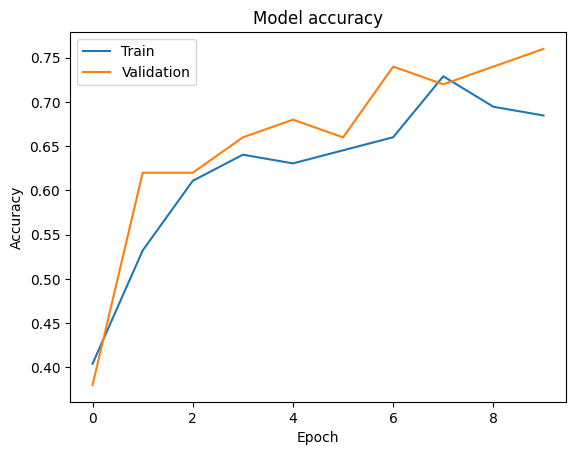

In [ ]:
import matplotlib.pyplot as plt

#Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

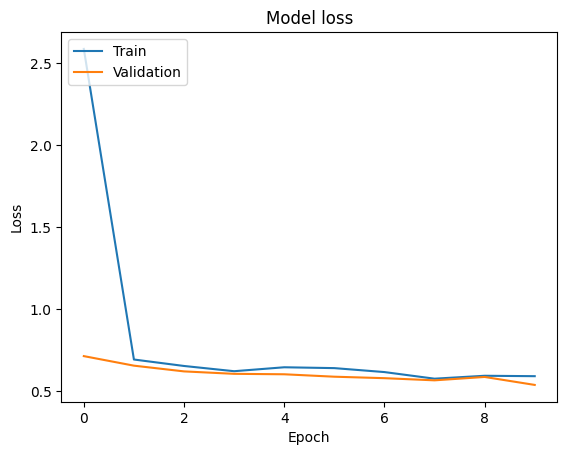

In [ ]:
#Plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## **Evaluate the model**


In [ ]:
test_datagen = ImageDataGenerator()

test_data = test_datagen.flow_from_directory('/content/brain_tumor_dataset',
                                             target_size = (256, 256),
                                             batch_size = 32,
                                             class_mode = 'categorical')

test_loss, test_accuracy = model.evaluate(test_data)
print(f' Test accuracy : {test_accuracy}')